In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [24]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [25]:
x =data.data

In [26]:
y =data.target

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
l =LinearRegression()

In [29]:
l.fit(X_train,y_train)

LinearRegression()

In [30]:
print(l.coef_)
print(l.intercept_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
151.34560453985995


In [31]:
y_pred =l.predict(X_test)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2  score:",r2_score(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

R2  score: 0.4526027629719196
RMSE: 53.85344583676592


In [33]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100)

In [34]:
R.fit(X_train,y_train)

Ridge(alpha=100)

In [35]:
print(R.coef_)
print(R.intercept_)

[ 2.41457328  0.03631503  7.68959184  5.78651722  2.48854891  1.90201877
 -4.83251122  5.39725175  7.07265406  5.0306732 ]
153.69087475006762


In [36]:
y_pred1 =R.predict(X_test)

In [37]:
print("R2 score:",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score: 0.012171803489062438
RMSE 72.3440646257758


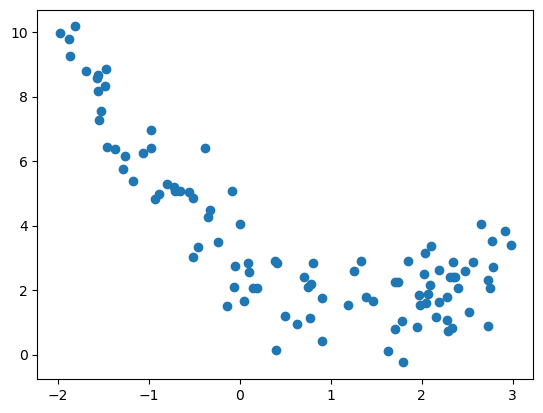

In [38]:
m =100
x1 =5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

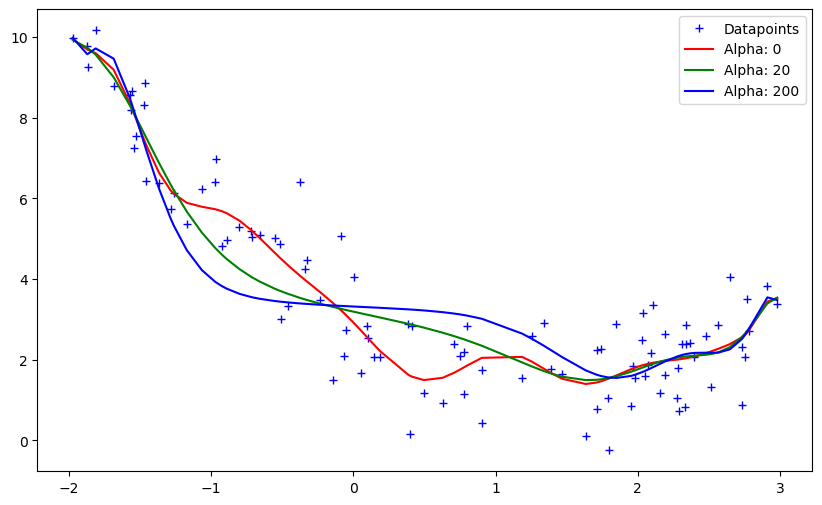

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_ridge(x1,x2,alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas =[0,20 ,200]
cs =['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label ='Datapoints')

for alpha, c in zip(alphas,cs):
       preds = get_ridge(x1, x2, alpha)
       # Plot
       plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show() 